Code by: Jarlai Morris



Brainstorming/steps/checklist:
    > dataset
    > clean it
    > visualizations
    > see if any further cleaning needs to be done
    > build KNN
    > build system

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors



In [6]:
ls

README.txt   links.csv    movies.csv   ratings.csv  tags.csv


In [7]:
# read ratings.csv into a dataframe
df = pd.read_csv('ratings.csv', 
                usecols=['userId','movieId', 'rating'],
                dtype={'userId': 'int32', 'movieId': 
                       'int32', 'rating': 'float32'},  skipinitialspace=True)

df.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [13]:
# read movies.csv into a dataframe
movies = pd.read_csv('movies.csv',
                     usecols=['movieId', 'title','genres'],
                     dtype={'movieId': 'int32', 'title': 'str', 'genres':'str'})
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
print(len(df))

100836


In [22]:
# total number of users and movies reviewed
users = len(df.userId.unique())
ratings = len(df.rating)
movie = len(movies.movieId.unique())
print('movies : ', move, "user: ", users)

movies: 9742 user: 610


In [23]:
#checking to ensure that the below data frame is correct
count = 0
for i in df['rating']:
    if i == 4.0:
        count += 1
count

26818

In [57]:
# generate the dataframe for the ratings and how many times each 
# rating was given to a film 
ratings_plot = pd.DataFrame(df.groupby('rating').size(), columns=['count'])
ratings_plot.head(10)


,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


100836

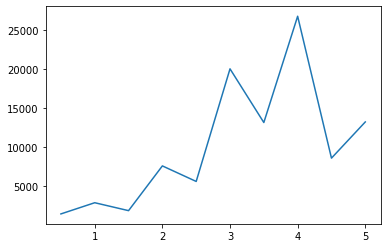

In [25]:
import matplotlib.pyplot as plt 
plt.plot(ratings_plot['count'])

In [54]:
total = movie_total * user_total
trat = ratings_plot['count'].sum()
zeros = 1
print(trat)
#print(len(df['rating']))
total

100837
100836


,count
movieId,
1,131150
2,67100
3,31720
4,4270
5,29890
...,...
193581,610
193583,610
193585,610


In [27]:
ratings_plot = ratings_plot.append(pd.DataFrame({'count': zeros}, 
                                    index=[0.0]),
                                   verify_integrity=True,
                                  ).sort_index()


In [28]:
ratings_plot.head(10)

,count
0.0,1
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [53]:
final = ratings_plot['count'].sum()
final

100837

Text(0, 0.5, 'number of ratings')

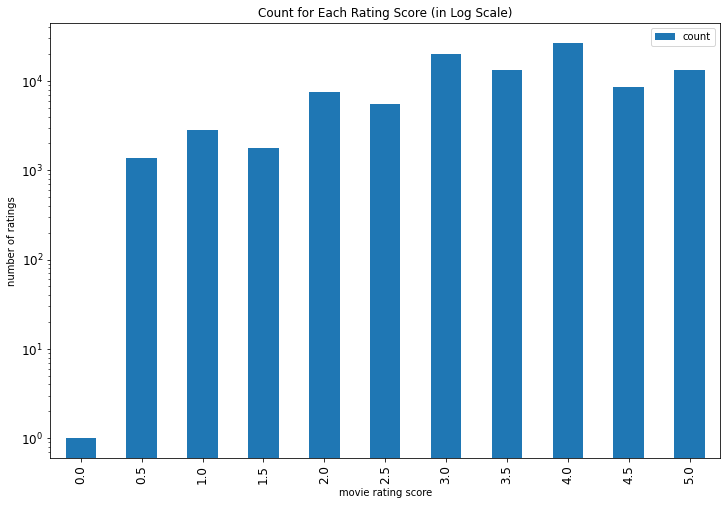

In [29]:
# visualization of the number of ratings recieved 
ax = ratings_plot[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

> people tend to give out 4.0 ratings and are least likely to give out 0.0.

> create a word cloud for the most watched movies

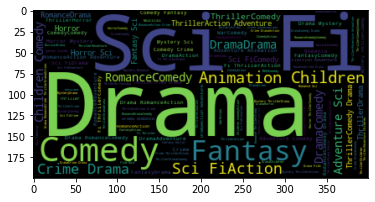

In [30]:
#it's pretty to look at. People love drama.
g = movies['genres'].tolist()
genre = ''.join(g)
wordcloud = WordCloud().generate(genre)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


In [31]:
# data parsing
# how many times was each movie
# filter data
movie_total = pd.DataFrame(df.groupby('movieId').size(), columns=['count'])
movie_total.head(100)

,count
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
107,26
108,1
110,237


In [125]:
print(movie_total.columns)


Index(['count'], dtype='object')


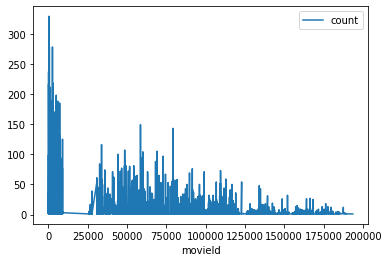

In [124]:
movie_total.plot.line(y='count')

In [119]:
average = movie_total['count'].mean()
print(average)

10.369806663924312


In [30]:
# how many times each movie was watched
movie_total.head()

,count
movieId,
1,215
2,110
3,52
4,7
5,49


In [31]:
# how many films recieved less than the average number of ratings
#10.36
count = 0
for i in movie_total['count']:
    if i >= average:
        count += 1
count

2269

In [33]:
# round the average to 10 
average = 10 
popular = list(set(movie_total.query('count >= @average').index))
final_movies = df[df.movieId.isin(popular)]
print('inital shape ', df.shape)
print('final_shape ', final_movies.shape)
        
final_movies.head()

inital shape  (100836, 3)
final_shape  (81116, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [37]:
# number of users
users_total = pd.DataFrame(df.groupby('userId').size(), columns=['count'])
users_total.head(100)

,count
userId,
1,232
2,29
3,39
4,216
5,44
...,...
96,78
97,36
98,92


In [38]:
count = 0
for i in users_total['count']:
    if i < 132:
        count += 1
count

416

In [39]:
print(users_total.columns)

Index(['count'], dtype='object')


Text(0, 0.5, 'users')

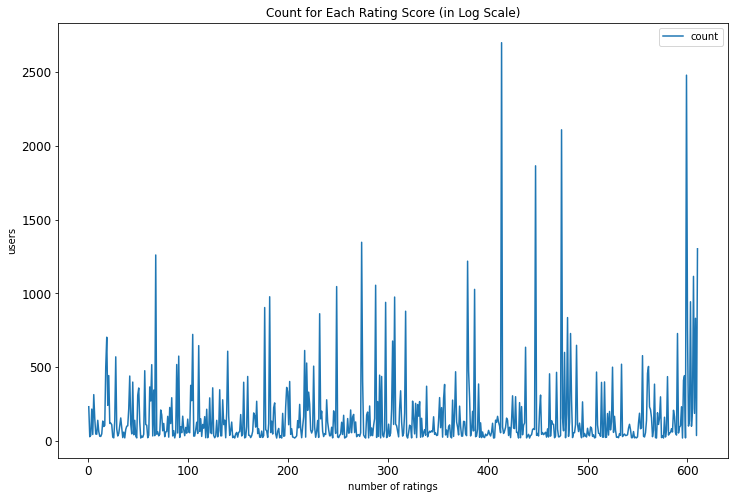

In [145]:
# visualization of how often raters rate 
ax = users_total[['count']].reset_index().rename(columns={'index': 'raters'}).plot(
    x='raters',
    y='count',
    kind='line',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    fontsize=12,
)
ax.set_xlabel("number of ratings")
ax.set_ylabel("users")

In [41]:
# calculate the average number of reviews made by users 
average_user = users_total['count'].mean()
average_user = 132


In [47]:

average = average_user
# if the number of ratings is greater than or equal to the averge add it to the active list
active = list(set(users_total.query('count >= @average').index))
# creating the final user data frame
final_users = df[df.userId.isin(active)]
print('inital shape: ', df.shape)
print('final shape: ', final_users.shape)

inital shape:  (100836, 3)
final shape:  (78091, 3)


In [49]:
# shape the data
# pivot and create movie-user matrix
# indexed by movie id
# columns = the id of the raters
# values = ratings for movies
movie_matrix = final_users.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)
movie_matrix.head()



userId,1,4,6,7,10,15,18,19,20,21,...,597,599,600,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,2.5,3.5,4.0,0.0,3.5,...,4.0,3.0,2.5,0.0,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,...,0.0,2.5,4.0,4.0,0.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# mapper dictionary that maps each movie to their respective IDs
movie_to_idx = {
    movie:i for i, movie in
    enumerate(list(movies.set_index('movieId').loc[movie_matrix.index].title))
    
}

In [82]:
from scipy.sparse import csr_matrix
movie_sparse = csr_matrix(movie_matrix)

In [83]:
# fitting the model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fitting the model to the movie matrix
model_knn.fit(movie_matrix)



NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [84]:
from fuzzywuzzy import fuzz
#Source: https://beckernick.github.io/music_recommender/

def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data

    fav_movie: str, name of user input movie
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]


In [91]:
def recommendations(model_knn, data, mapper, fav, n_recommendations):
    model_knn.fit(data)
    idx = fuzzy_matching(mapper, fav, verbose=True)
    distance, indices = model_knn.kneighbors(data[idx],n_neighbors=n_recommendations+1)
    #https://heartbeat.fritz.ai/recommender-systems-with-python-part-ii-collaborative-filtering-k-nearest-neighbors-algorithm-c8dcd5fd89b2
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [93]:
my_fav ='Toy Story'
recommendations(
    model_knn = model_knn,
    data = movie_sparse,
    fav= my_fav,
    mapper = movie_to_idx,
    n_recommendations=10
)

Found possible matches in our database: ['Toy Story (1995)', 'Toy Story 3 (2010)', 'Toy Story 2 (1999)']

Recommendations for Toy Story:
1: Toy Story 2 (1999), with distance of 0.27108627557754517
2: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981), with distance of 0.27062737941741943
3: Men in Black (a.k.a. MIB) (1997), with distance of 0.2696112394332886
4: Back to the Future (1985), with distance of 0.26732200384140015
5: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.2519097328186035
6: Star Wars: Episode IV - A New Hope (1977), with distance of 0.24972432851791382
7: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.24856066703796387
8: Forrest Gump (1994), with distance of 0.24594992399215698
9: Shrek (2001), with distance of 0.24404966831207275
10: Jurassic Park (1993), with distance of 0.2417251467704773
